# Papcorns Data Scientist Task - Getting Started

This notebook will help you get started with the Papcorns data scientist technical assessment. We'll show you how to:
1. Install requirements and do the imports
2. Connect to the SQLite database
3. Load the data into pandas DataFrames

First, let's import the required libraries:


## Installing Requirements

Let's install the required libraries:

In [1]:
!pip install -r requirements.txt

## Imports

Let's do the imports:

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
plt.style.use('seaborn')
sns.set_palette('deep')

## Connecting to the Database

Let's establish a connection to the SQLite database:

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('papcorns.sqlite')

## Exploring the Data Structure

Let's look at the structure of our tables:

In [3]:
# Load users table
users_df = pd.read_sql_query("SELECT * FROM users LIMIT 5;", conn)
print("Users table preview:")
display(users_df)

# Load events table
events_df = pd.read_sql_query("SELECT * FROM user_events LIMIT 5;", conn)
print("\nUser events table preview:")
display(events_df)

Users table preview:


,id,created_at,attribution_source,country,name
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore



User events table preview:


,id,created_at,user_id,event_name,amount_usd
0,1,2024-05-07T00:00:00,1,app_install,None
1,2,2024-05-12T00:00:00,1,trial_started,None
2,3,2024-05-24T00:00:00,1,trial_cancelled,None
3,4,2024-10-12T00:00:00,2,app_install,None
4,5,2024-10-13T00:00:00,2,trial_started,None


In [6]:
# SQL sorgusunu çalıştır
query = """
SELECT users.country, SUM(user_events.amount_usd) AS total_revenue
FROM user_events
JOIN users ON user_events.user_id = users.id
WHERE user_events.event_name IN ('subscription_started', 'subscription_renewed')
GROUP BY users.country;
"""
revenue_by_country = pd.read_sql_query(query, conn)


# Sonucu yazdır
print(revenue_by_country)

  country  total_revenue
0      NL        3335.29
1      TR        2275.44
2      US        4035.96


In [7]:
# SQL sorgusu (örnek: users tablosunu çekme)
query = "SELECT * FROM users"
df_users = pd.read_sql(query, conn)

# SQL sorgusu (örnek: user_events tablosunu çekme)
query = "SELECT * FROM user_events"
df_events = pd.read_sql(query, conn)

# İlk 5 satırı yazdır
print(df_users.head())
print(df_events.head())

   id           created_at attribution_source country          name
0   1  2024-05-07T00:00:00          instagram      US     Eve Brown
1   2  2024-10-12T00:00:00          instagram      NL   Frank Moore
2   3  2024-10-15T00:00:00             tiktok      TR  Ivy Anderson
3   4  2024-08-28T00:00:00             tiktok      TR   Alice Brown
4   5  2024-04-03T00:00:00            organic      NL     Bob Moore
   id           created_at  user_id       event_name  amount_usd
0   1  2024-05-07T00:00:00        1      app_install         NaN
1   2  2024-05-12T00:00:00        1    trial_started         NaN
2   3  2024-05-24T00:00:00        1  trial_cancelled         NaN
3   4  2024-10-12T00:00:00        2      app_install         NaN
4   5  2024-10-13T00:00:00        2    trial_started         NaN


In [11]:
# Users ve User Events veri tipleri
print("Users Veri Tipleri:")
print(df_users.dtypes)

print("\nUser Events Veri Tipleri:")
print(df_events.dtypes)


Users Veri Tipleri:
id                     int64
created_at            object
attribution_source    object
country               object
name                  object
dtype: object

User Events Veri Tipleri:
id              int64
created_at     object
user_id         int64
event_name     object
amount_usd    float64
dtype: object


In [12]:
# Eksik değerleri kontrol et
print("Users Tablosunda Eksik Değerler:")
print(df_users.isnull().sum())

print("\nUser Events Tablosunda Eksik Değerler:")
print(df_events.isnull().sum())


Users Tablosunda Eksik Değerler:
id                    0
created_at            0
attribution_source    0
country               0
name                  0
dtype: int64

User Events Tablosunda Eksik Değerler:
id               0
created_at       0
user_id          0
event_name       0
amount_usd    2255
dtype: int64


In [13]:
# Sayısal sütunlar için özet istatistikler
print("Users Tablosu - Özet İstatistikler:")
print(df_users.describe())

print("\nUser Events Tablosu - Özet İstatistikler:")
print(df_events.describe())


Users Tablosu - Özet İstatistikler:
                id
count  1002.000000
mean    501.500000
std     289.396786
min       1.000000
25%     251.250000
50%     501.500000
75%     751.750000
max    1002.000000

User Events Tablosu - Özet İstatistikler:
                id      user_id   amount_usd
count  3486.000000  3486.000000  1231.000000
mean   1743.500000   502.910499     7.836466
std    1006.465846   289.650625     2.220009
min       1.000000     1.000000     4.990000
25%     872.250000   256.250000     4.990000
50%    1743.500000   499.500000     8.990000
75%    2614.750000   754.000000     9.990000
max    3486.000000  1002.000000     9.990000


In [14]:
# Ülkelere göre dağılım
print("Kullanıcıların Ülkelere Göre Dağılımı:")
print(df_users['country'].value_counts())


Kullanıcıların Ülkelere Göre Dağılımı:
TR    354
US    340
NL    308
Name: country, dtype: int64


In [15]:
# Atama kaynaklarına göre dağılım
print("Kullanıcıların Atama Kaynaklarına Göre Dağılımı:")
print(df_users['attribution_source'].value_counts())


Kullanıcıların Atama Kaynaklarına Göre Dağılımı:
tiktok       352
organic      344
instagram    306
Name: attribution_source, dtype: int64


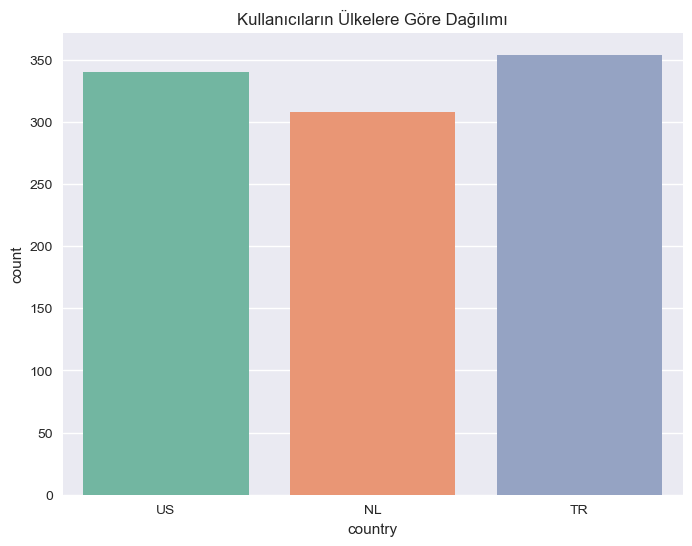

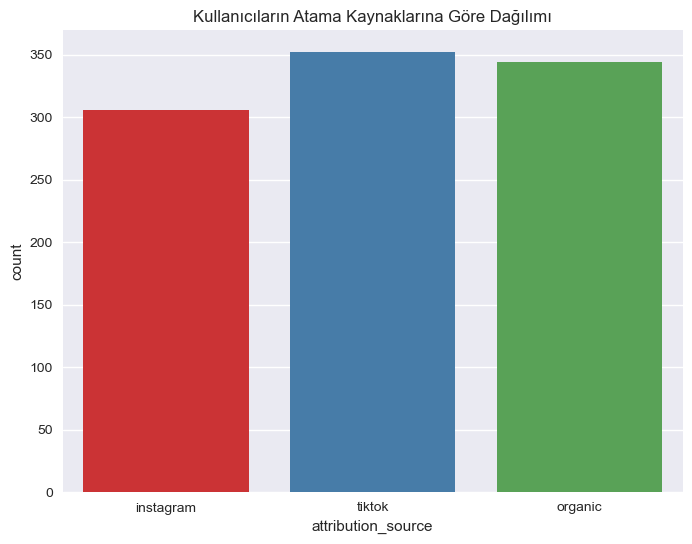

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ülkelere göre dağılımı görselleştir
plt.figure(figsize=(8, 6))
sns.countplot(x='country', data=df_users, palette='Set2')
plt.title('Kullanıcıların Ülkelere Göre Dağılımı')
plt.show()

# Atama kaynaklarına göre dağılımı görselleştir
plt.figure(figsize=(8, 6))
sns.countplot(x='attribution_source', data=df_users, palette='Set1')
plt.title('Kullanıcıların Atama Kaynaklarına Göre Dağılımı')
plt.show()


In [21]:
# Users tablosunda satır sayısını görmek
print("Users Tablosundaki Satır Sayıları:")
print(df_users.count())

# User Events tablosunda satır sayısını görmek
print("\nUser Events Tablosundaki Satır Sayıları:")
print(df_events.count())


Users Tablosundaki Satır Sayıları:
id                    1002
created_at            1002
attribution_source    1002
country               1002
name                  1002
dtype: int64

User Events Tablosundaki Satır Sayıları:
id            3486
created_at    3486
user_id       3486
event_name    3486
amount_usd    1231
dtype: int64


In [22]:
# 'amount_usd' sütununda veri bulunan satırları filtrele
non_null_amount_usd = df_events[df_events['amount_usd'].notnull()]

# İlk 10 satırı göster
print(non_null_amount_usd.head(10))


    id           created_at  user_id            event_name  amount_usd
5    6  2024-10-20T00:00:00        2  subscription_started        8.99
6    7  2024-11-19T00:00:00        2  subscription_renewed        8.99
7    8  2024-12-19T00:00:00        2  subscription_renewed        8.99
8    9  2025-01-18T00:00:00        2  subscription_renewed        8.99
12  13  2024-10-21T00:00:00        3  subscription_started        4.99
13  14  2024-11-20T00:00:00        3  subscription_renewed        4.99
14  15  2024-12-20T00:00:00        3  subscription_renewed        4.99
15  16  2025-01-19T00:00:00        3  subscription_renewed        4.99
27  28  2024-08-28T00:00:00        8  subscription_started        4.99
28  29  2024-09-27T00:00:00        8  subscription_renewed        4.99


For the numeric data types id and user_id, the sum, mean, standard deviation, min-max values are meaningless. The results for the amount_usd column are OK, but they are meaningless because it stands alone. This code block was not useful for dataset discovery. 